How to generate images that can be overlayed on a `leaflet` map.

In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Data

In [2]:
dlon, dlat = 0.5, 0.5
lonmin = -10.
lonmax = 35.
latmin = 36.
latmax = 75.
lon = np.arange(lonmin, lonmax + dlon * .1, dlon)
lat = np.arange(latmin, latmax + dlat * .1, dlat)

In [3]:
# Create a field
llon, llat = np.meshgrid(lon, lat)
f = 2 * np.cos(llon) + np.sin(llat)

## Define the projection
The key is to defined the optional parameter `epsg`.

In [7]:
m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin,
            urcrnrlon=lonmax, urcrnrlat=latmax, 
            resolution = 'l', epsg=3857)

## Make the plot

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


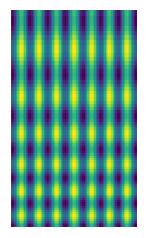

In [9]:
fig = plt.figure(frameon=False)
ax = plt.subplot(111)
ax.axis('off')
m.pcolormesh(llon, llat, f, latlon=True,)
plt.savefig("./fig4leaflet.png", transparent=True, dpi=300,
        bbox_inches='tight', pad_inches=0)
plt.pcolormesh(f)
plt.show()
plt.close()

## Add it to your map
In javascript:

```javascript
var coarseMaskImg = './fig4leaflet.png';
imageBounds = [[36., -10.], [75., 35.]];
L.imageOverlay(coarseMaskImg, imageBounds).addTo(map);
```